Number of records after cleaning: 674
The train picked most passengers from station: S
   survived  pclass     sex   age  sibsp  parch     fare station
0         0       3    male  22.0      1      0   7.2500       S
1         1       1  female  38.0      1      0  71.2833       C
2         1       3  female  26.0      0      0   7.9250       S
3         1       1  female  35.0      1      0  53.1000       S
4         0       3    male  35.0      0      0   8.0500       S
<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  674 non-null    int64  
 1   pclass    674 non-null    int64  
 2   sex       674 non-null    object 
 3   age       674 non-null    float64
 4   sibsp     674 non-null    int64  
 5   parch     674 non-null    int64  
 6   fare      674 non-null    float64
 7   station   674 non-null    object 
dtypes: float64(2), int64(4), obje

C:\Users\aryad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aryad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


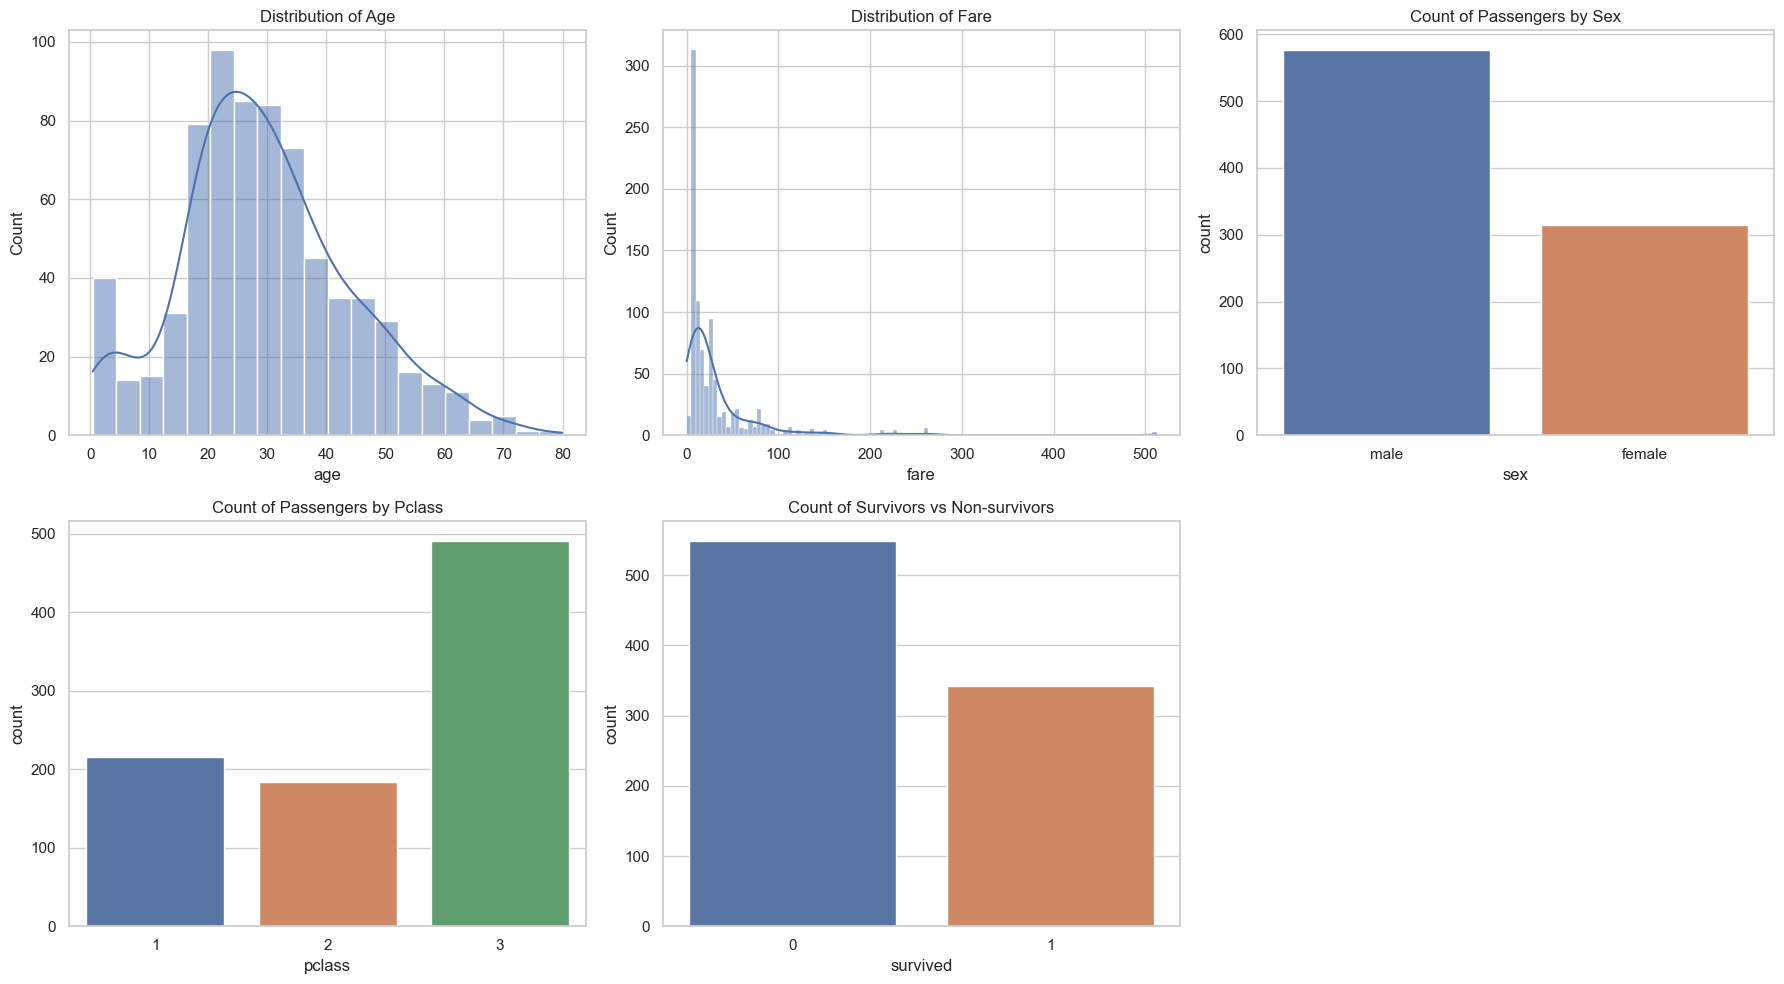

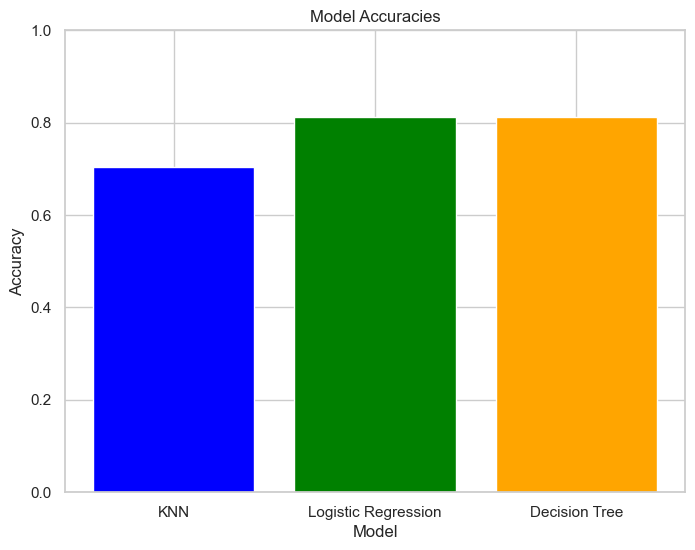

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Q1. Data Cleaning

data = pd.read_csv(r"C:\Users\aryad\Downloads\BUSA523_Project\TrainData.csv")

# Handling missing values
data.dropna(inplace=True)

# Removing unwanted records, we're only dropping duplicates
data.drop_duplicates(inplace=True)
    
# Count the number of records after cleaning
clean_records = len(data)
print("Number of records after cleaning:", clean_records)

# Q2. Passenger Stations
most_picked_station = data['station'].value_counts().idxmax()
print("The train picked most passengers from station:", most_picked_station)

# Q3. Data Exploration
print(data.head())  # Displaying the first few rows of the dataset
print(data.info())  # information about the dataset
print(data.describe())  # summary statistics

# variables to exclude from analysis
exclude_variables = ['PassengerId', 'Name', 'Ticket']

# Q4. Outliers Detection and Treatment
def treat_outliers(data, column):       # Defining a function to detect and treat outliers using the IQR method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    # Treat outliers by capping them at the upper and lower bounds
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return data, outliers

numerical_columns = ['age', 'sibsp', 'parch', 'fare']
outliers_dict = {}
for col in numerical_columns:
    data, outliers = treat_outliers(data, col)
    outliers_dict[col] = outliers

for col, outliers in outliers_dict.items():
    print("Outliers in column '{}':".format(col))
    print(outliers)

# Encoding categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'station'], drop_first=True)

# Q5. Data Partitioning
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Q6. KNN Model
k_values = [3, 5, 7, 9]  # Example values of k to try
best_accuracy = 0
best_k = None
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print("Best KNN model accuracy:", best_accuracy)
print("Best value of k:", best_k)

# Q7. Logistic Regression Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy:", log_reg_accuracy)

# Q8. Decision Tree Model
# Assuming maxdepth = 5
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree model accuracy:", tree_accuracy)
print("Chosen tree depth:", tree.max_depth)

# Q9. Model Comparison
model_accuracies = {
    'KNN': best_accuracy,
    'Logistic Regression': log_reg_accuracy
}
best_model = max(model_accuracies, key=model_accuracies.get)
print("Best model to classify the data:", best_model)

#Q10 Graphs/Plotting

data = pd.read_csv(r"C:\Users\aryad\Downloads\BUSA523_Project\TrainData.csv")
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot 1: Distribution of age
sns.histplot(data['age'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Age')

# Plot 2: Distribution of fare
sns.histplot(data['fare'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Fare')

# Plot 3: Count of passengers by sex
sns.countplot(x='sex', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Count of Passengers by Sex')

# Plot 4: Count of passengers by pclass
sns.countplot(x='pclass', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Count of Passengers by Pclass')

# Plot 5: Count of survivors vs non-survivors
sns.countplot(x='survived', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Count of Survivors vs Non-survivors')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Define model accuracies
model_accuracies = {
    'KNN': best_accuracy,
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree': tree_accuracy
}

# Plotting model accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()